In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Set working directory

In [ ]:
import os
WORK_DIR = '/content/drive/MyDrive/Scene_Recognition/LSTM'

os.chdir(WORK_DIR)
os.listdir()

['Resnet_LBP_2.ipynb',
 'YUP++.zip',
 'camera_stationary',
 'camera_moving',
 '10_90_randsplit_1.txt',
 'frames',
 'data_frames.csv',
 'LBP_frames',
 'resnet',
 'LSTM',
 'vgg',
 '.ipynb_checkpoints',
 'train_images',
 'test_images',
 'train_LBP_frames',
 'test_LBP_frames',
 'train_frame_data.csv',
 'test_frame_data.csv',
 'train_videos',
 'test_videos',
 'resnet2',
 'VGG_LBP.ipynb',
 'Resnet_LBP.ipynb',
 'LSTM2',
 'LSTM_LBP.ipynb']

# Set data directory

In [ ]:
STATIONARY_DATA_DIR = '/content/drive/MyDrive/Scene_Recognition/LSTM/camera_stationary'
MOVING_DATA_DIR = '/content/drive/MyDrive/Scene_Recognition/LSTM/camera_moving'
class_names = os.listdir(STATIONARY_DATA_DIR)

In [ ]:
class_names

['Beach',
 'BuildingCollapse',
 'Elevator',
 'Escalator',
 'FallingTrees',
 'Fireworks',
 'ForestFire',
 'Fountain',
 'Highway',
 'LightningStorm',
 'Marathon',
 'Ocean',
 'Railway',
 'RushingRiver',
 'SkyClouds',
 'Snowing',
 'Street',
 'Waterfall',
 'WavingFlags',
 'WindmillFarm']

In [ ]:
# os.listdir("/content/drive/MyDrive/Scene_Recognition/LSTM/camera_stationary/Beach")[:2]

['Beach_static_cam_1.mp4', 'Beach_static_cam_10.mp4']

## spliting training and testing videos

In [ ]:
# creting training and testing paths 
# import shutil
# path = "/content/drive/MyDrive/Scene_Recognition"
# train_path = path+"/"+"train_videos"
# os.mkdir(train_path)
# test_path = path+"/"+"test_videos"
# os.mkdir(test_path)

In [ ]:
'''
# extracting videos for training
ls_folders = [STATIONARY_DATA_DIR,MOVING_DATA_DIR]

for i in ls_folders:
  for j in class_names:
    # path = i
    path = i+"/"+j
    img_list = list(os.listdir(path))
    training_videos = img_list[:20]
    for k in range(len(training_videos)):
      if(os.path.exists(train_path+"/"+j)):
        pass
      else:
        os.mkdir(train_path+"/"+j)
      shutil.copy(path+"/"+training_videos[k], train_path+"/"+j+"/")'''
        

In [ ]:
'''
#extracting videos for testing
ls_folders = [STATIONARY_DATA_DIR,MOVING_DATA_DIR]

for i in ls_folders:
  for j in class_names:
    # path = i
    path = i+"/"+j
    img_list = list(os.listdir(path))
    testing_videos = img_list[20:]
    for k in range(len(testing_videos)):
      if(os.path.exists(test_path+"/"+j)):
        pass
      else:
        os.mkdir(test_path+"/"+j)
      shutil.copy(path+"/"+testing_videos[k], test_path+"/"+j+"/")
      '''

# Unzip the dataset
### (run this code only once)

In [ ]:
#import zipfile
#with zipfile.ZipFile('/gdrive/My Drive/LSTM/YUP++.zip', 'r') as zip:
#    zip.extractall()

In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/15V1GyiiXyjkVGWU7Vj98bhhqxOJQSsT2/LSTM


In [ ]:
%cd /content

/content


In [ ]:
!unzip /content/drive/MyDrive/Scene_Recognition/LSTM/YUP++.zip

# Load Data
extract frames from the videos

### Stationary camera videos
(run this code only once to extract frames)

In [ ]:
'''
import cv2     # for capturing videos
import math

frame_names = []
frame_class = []

width = 150
height = 150
dim = (width, height)

for class_ in class_names:
  os.chdir(STATIONARY_DATA_DIR+'/'+class_)

  for file_name in os.listdir():
    count = 0
    videoFile = file_name
    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
    frameRate = cap.get(4) #frame rate
    x = 1
    while(cap.isOpened()):
      frameId = cap.get(1) #current frame number
      ret, frame = cap.read()
      if (ret != True):
          break
      #print(frameId)
      #print(frameRate)
      if (frameId // math.floor(frameRate) == 0):

        os.chdir(WORK_DIR+'/frames')
        filename =class_+"_stationary_frame%d.jpg" % count;
        frame_names.append(filename)
        frame_class.append(class_)
        count += 1
        resized = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
        cv2.imwrite(filename, resized)

    cap.release()
print ("Done!")
'''

Done!


### Moving camera videos
(run this code only once to extract frames)

In [ ]:
'''
import cv2     # for capturing videos
import math

moving_frame_names = []
moving_frame_class = []

width = 150
height = 150
dim = (width, height)


for class_ in class_names:
  os.chdir(MOVING_DATA_DIR+'/'+class_)

  for file_name in os.listdir():
    count = 0
    videoFile = file_name
    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
    frameRate = cap.get(4) #frame rate
    x = 1
    while(cap.isOpened()):
      frameId = cap.get(1) #current frame number
      ret, frame = cap.read()
      if (ret != True):
          break
      #print(frameId)
      #print(frameRate)
      if (frameId // math.floor(frameRate) == 0):

        os.chdir(WORK_DIR+'/frames')
        filename =class_+"_moving_frame%d.jpg" % count;
        moving_frame_names.append(filename)
        moving_frame_class.append(class_)
        count += 1
        resized = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
        cv2.imwrite(filename, resized)

    cap.release()
print ("Done!")
'''

Done!


# Load data into a dataframe
(run once)

In [ ]:
'''
# switching to working directory
os.chdir(WORK_DIR)

# read images
import matplotlib.pyplot as plt
import cv2

IMAGE_DIR = WORK_DIR + '/images'
grayscaled_images = [cv2.imread(IMAGE_DIR+'/'+img, 0) for img in os.listdir(IMAGE_DIR)]
#grayscaled_images = [img/255 for img in images]


# create the required dataframe and save it.
import pandas as pd

data_df = pd.DataFrame()
data_df['file_name'] = frame_names + moving_frame_names
data_df['grayscale_images'] = grayscaled_images
data_df['class'] = frame_class + moving_frame_class
data_df.to_csv(WORK_DIR+'/frame_data.csv')

'''

## Till above we manipulated and saved the data in desired format. Now we can just use the dataframe to build our model.

# Load the datafile

In [1]:
import pandas as pd

# data_df = pd.read_csv('data_frames.csv')
# data_df = data_df.drop('Unnamed: 0', axis=1)
# data_df.head()

ModuleNotFoundError: No module named 'pandas'

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  5574 non-null   object
 1   class      5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Class distribution

In [3]:
# import seaborn as sns
import matplotlib.pyplot as plt

# sns.countplot(x = 'class', data = data_df)
# plt.xticks(rotation = 45)
# plt.show()

ModuleNotFoundError: No module named 'matplotlib'

# After downsampling

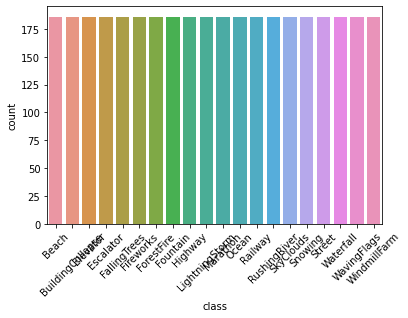

In [ ]:
groups = data_df.groupby(['class'], group_keys=False)
balanced_df = pd.DataFrame(groups.apply(lambda x:x.sample(groups.size().min()))).reset_index(drop=True)

sns.countplot(x = 'class', data = balanced_df)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  3720 non-null   object
 1   class      3720 non-null   object
dtypes: object(2)
memory usage: 58.2+ KB


# Extract LBP features
(run once)

In [6]:
2^7

5

In [ ]:

import cv2
from skimage.feature import 4local_binary_pattern

IMAGE_DIR = WORK_DIR + '/frames'

radius = 2
n_points = 8 * radius
os.chdir(WORK_DIR+'/LBP_frames')

for img in os.listdir(IMAGE_DIR):
  pic = cv2.imread(IMAGE_DIR+'/'+img, 0)
  lbp = local_binary_pattern(pic, n_points, radius, 'uniform')
  cv2.imwrite(img, lbp)



"\nimport cv2\nfrom skimage.feature import local_binary_pattern\n\nIMAGE_DIR = WORK_DIR + '/frames'\n\nradius = 2\nn_points = 8 * radius\nos.chdir(WORK_DIR+'/LBP_frames')\n\nfor img in os.listdir(IMAGE_DIR):\n  pic = cv2.imread(IMAGE_DIR+'/'+img, 0)\n  lbp = local_binary_pattern(pic, n_points, radius, 'uniform')\n  cv2.imwrite(img, lbp)\n\n"

# Visualisations

### Frame

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

IMAGE_DIR = WORK_DIR + '/frames'
im2 = cv2.imread(IMAGE_DIR+'/Beach_moving_frame67.jpg')
cv2_imshow(im2)

### LBP feature

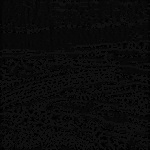

In [ ]:
from google.colab.patches import cv2_imshow
im2 = cv2.imread(WORK_DIR+'/LBP_frames/Beach_moving_frame67.jpg')
cv2_imshow(im2)

In [ ]:
len(class_names)

20

## One hot encoding

In [ ]:
# load target and one hot encoding

from keras.utils.np_utils import to_categorical

class_dict = {}
for i, c in enumerate(class_names):
  if c not in class_dict:
    class_dict[c] = i

y = balanced_df['class'].map(class_dict)
y_encoded = to_categorical(y, num_classes=20)

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

labels = lb.fit_transform(class_names)
print(f"Total Number of Classes: {len(lb.classes_)}")

Total Number of Classes: 20


In [ ]:
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

## Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(balanced_df['file_name'], y_encoded, test_size=0.25, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2790,)
(930,)
(2790, 20)
(930, 20)


In [ ]:
len(x_train)

2790

In [ ]:
# load train images
import cv2
os.chdir(WORK_DIR+'/LBP_frames')

train_img = []
for img in x_train:
  im = cv2.imread(WORK_DIR+'/LBP_frames'+'/'+img, 0)
  train_img.append(im)

In [ ]:
len(train_img)

2790

In [ ]:
# load test images

os.chdir(WORK_DIR+'/LBP_frames')

test_img = []
for img in x_test:
  im = cv2.imread(WORK_DIR+'/LBP_frames'+'/'+img, 0)
  test_img.append(im)

In [ ]:
import numpy as np
train_img = np.array(train_img,dtype=object)
test_img = np.array(test_img,dtype=object)

In [ ]:
train_img = train_img.astype(np.float32)
test_img = test_img.astype(np.float32)

In [ ]:
# train_img1 = train_img/255.0
# test_img1 = test_img/255.0

In [ ]:
# y_train1 = np.array(y_train).astype(np.float32)
# y_test1 = np.array(y_test).astype(np.float32)

## LSTM Model

In [ ]:
from keras.layers import Dense, LSTM, BatchNormalization, Dropout
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
train_img[0].shape

(150, 150)

In [ ]:
model = Sequential()
model.add(LSTM(150, input_shape = train_img[0].shape,return_sequences= True))
model.add(LSTM(64,return_sequences= True))
model.add(LSTM(64))
model.add(Dense(100, activation='relu'))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(20, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 150)          180600    
                                                                 
 lstm_1 (LSTM)               (None, 150, 64)           55040     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
Total params: 281,234
Trainable params: 281,234
Non-trai

In [ ]:

# fit network
epochs = 30
batch_size = 10
verbose = 1
model.fit(train_img, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=verbose, callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Epoch 1/30
224/224 [==============================] - 6s 28ms/step - loss: 1.5999 - accuracy: 0.5081 - val_loss: 1.7279 - val_accuracy: 0.4857
Epoch 2/30
224/224 [==============================] - 5s 23ms/step - loss: 1.5272 - accuracy: 0.5170 - val_loss: 1.7309 - val_accuracy: 0.4839
Epoch 3/30
224/224 [==============================] - 5s 23ms/step - loss: 1.4387 - accuracy: 0.5515 - val_loss: 1.7451 - val_accuracy: 0.5072
Epoch 4/30
224/224 [==============================] - 5s 23ms/step - loss: 1.4164 - accuracy: 0.5506 - val_loss: 1.7557 - val_accuracy: 0.5072
Epoch 5/30
224/224 [==============================] - 5s 23ms/step - loss: 1.3554 - accuracy: 0.5739 - val_loss: 1.9955 - val_accuracy: 0.4516
Epoch 6/30
224/224 [==============================] - 5s 23ms/step - loss: 1.3239 - accuracy: 0.5905 - val_loss: 1.5433 - val_accuracy: 0.5609
Epoch 7/30
224/224 [==============================] - 5s 24ms/step - loss: 1.2421 - accuracy: 0.6084 - val_loss: 1.4890 - val_accuracy: 0.5806

In [ ]:
os.chdir(WORK_DIR)
model.save(WORK_DIR + '/LSTM2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Scene_Recognition/LSTM/LSTM2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Scene_Recognition/LSTM/LSTM2/assets


In [ ]:
from tensorflow import keras
base_model = keras.models.load_model(WORK_DIR + '/LSTM2')

In [ ]:
model_evaluation_history = base_model.evaluate(test_img, y_test)

30/30 [==============================] - 1s 13ms/step - loss: 1.3164 - accuracy: 0.6849


In [ ]:
from keras.preprocessing import image
from sklearn.metrics import classification_report
prd_class =[]
for i in x_test:
  # print("/content/drive/MyDrive/Scene_Recognition/LSTM/frames/"+i)
  img = cv2.imread("/content/drive/MyDrive/Scene_Recognition/LSTM/frames/"+i)

  resized_frame = cv2.resize(img, (150, 150))

  gray = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
  lbp = local_binary_pattern(gray, 16, 2, 'uniform')

  predicted_labels_probabilities = base_model.predict(np.expand_dims(lbp, axis = 0))
  predicted_label = np.argmax(predicted_labels_probabilities)
  # print(predicted_label)

  # output = np.argmax(base_model.predict(lbp).reshape(1,-1), axis=1)
  prd_class.append(predicted_label)


In [ ]:
print(classification_report(y_test.argmax(axis=1),prd_class, target_names=class_names))

                  precision    recall  f1-score   support

           Beach       0.68      0.81      0.74        53
BuildingCollapse       0.83      0.68      0.75        59
        Elevator       0.92      0.90      0.91        52
       Escalator       0.50      0.48      0.49        46
    FallingTrees       0.51      0.85      0.64        48
       Fireworks       0.87      0.89      0.88        46
      ForestFire       0.63      0.62      0.63        42
        Fountain       0.59      0.45      0.51        44
         Highway       0.38      0.46      0.42        46
  LightningStorm       0.81      0.80      0.80        44
        Marathon       0.64      0.36      0.46        44
           Ocean       0.53      0.66      0.59        41
         Railway       0.73      0.90      0.81        51
    RushingRiver       0.42      0.30      0.35        43
       SkyClouds       0.71      0.49      0.58        51
         Snowing       0.59      0.55      0.57        42
          Str

## video predictions

In [ ]:
IMAGE_HEIGHT, IMAGE_WIDTH = 150, 150
video_file_path = "/content/drive/MyDrive/Scene_Recognition/LSTM/camera_stationary/Beach/Beach_static_cam_1.mp4"
video_title = "Beach_static_cam_1"
# Make the Output directory if it does not exist
test_videos_directory = 'test_videos'
os.makedirs(test_videos_directory, exist_ok = True)
output_file_path = "f'{test_videos_directory}/{video_title}-Output.mp4'"

In [ ]:
def predict_on_video(video_file_path, output_file_path):    
    '''
    This function will perform action recognition on a video using the LRCN model.
    Args:
    video_file_path:  The path of the video stored in the disk on which the action recognition is to be performed.
    output_file_path: The path where the ouput video with the predicted action being performed overlayed will be stored.
    SEQUENCE_LENGTH:  The fixed number of frames of a video that can be passed to the model as one sequence.
    '''

    # Initialize the VideoCapture object to read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)

    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Initialize the VideoWriter Object to store the output video in the disk.
    video_writer = cv2.VideoWriter("Beach_static_cam_2.avi", cv2.VideoWriter_fourcc(*'MJPG'), 
                                   video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))
    
    predicted_labels_probabilities_np = np.zeros((150, 20), dtype = float)

    # Declare a queue to store video frames.
    frames_queue = deque()

    # Initialize a variable to store the predicted action being performed in the video.
    predicted_class_name = ''

    # Iterate until the video is accessed successfully.
    while video_reader.isOpened():

        # Read the frame.
        ok, frame = video_reader.read() 

        
        # Check if frame is not read properly then break the loop.
        if not ok:
            break

        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        gray = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)

        # print(gray.shape)
        
        lbp = local_binary_pattern(gray, 16, 2, 'uniform')

#       # Appending the pre-processed frame into the frames list.
        frames_queue.append(lbp)
        for i in range(len(frames_queue)):
          # print(frames_queue[i].shape)
#         # Pass the normalized frames to the model and get the predicted probabilities.
          predicted_labels_probabilities = base_model.predict(np.expand_dims(frames_queue[i], axis = 0))[0]

          predicted_labels_probabilities_np[i] = predicted_labels_probabilities

#         # Get the index of class with highest probability.
          predicted_label = np.argmax(predicted_labels_probabilities)

              

#         # Get the class name using the retrieved index.
          predicted_class_name = class_names[predicted_label]
        
#         # Write predicted class name on top of the frame.

        # img = cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        # cv2_imshow(img)
#         # Write The frame into the disk using the VideoWriter Object.
        video_writer.write(frame)

    predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)

    # Sorting the Averaged Predicted Labels Probabilities
    predicted_labels_probabilities_averaged_sorted_indexes = np.argsort(predicted_labels_probabilities_averaged)[::-1]

    # Iterating Over All Averaged Predicted Label Probabilities
    for predicted_label in predicted_labels_probabilities_averaged_sorted_indexes:
        # print(type())

        # Accessing The Class Name using predicted label.
        predicted_class_name = class_names[predicted_label]

        # Accessing The Averaged Probability using predicted label.
        predicted_probability = predicted_labels_probabilities_averaged[predicted_label]

        print(f"CLASS NAME: {predicted_class_name}   AVERAGED PROBABILITY: {(predicted_probability*100):.2}")

        
    # Release the VideoCapture and VideoWriter objects.
    video_reader.release()
    video_writer.release()

In [ ]:
predict_on_video(video_file_path, output_file_path)

CLASS NAME: Beach   AVERAGED PROBABILITY: 7.9e+01
CLASS NAME: Snowing   AVERAGED PROBABILITY: 4.7
CLASS NAME: Railway   AVERAGED PROBABILITY: 4.2
CLASS NAME: Marathon   AVERAGED PROBABILITY: 3.0
CLASS NAME: WavingFlags   AVERAGED PROBABILITY: 1.9
CLASS NAME: Escalator   AVERAGED PROBABILITY: 1.4
CLASS NAME: FallingTrees   AVERAGED PROBABILITY: 1.3
CLASS NAME: ForestFire   AVERAGED PROBABILITY: 1.1
CLASS NAME: Ocean   AVERAGED PROBABILITY: 1.0
CLASS NAME: Fountain   AVERAGED PROBABILITY: 0.62
CLASS NAME: Highway   AVERAGED PROBABILITY: 0.52
CLASS NAME: RushingRiver   AVERAGED PROBABILITY: 0.31
CLASS NAME: SkyClouds   AVERAGED PROBABILITY: 0.23
CLASS NAME: Waterfall   AVERAGED PROBABILITY: 0.23
CLASS NAME: Elevator   AVERAGED PROBABILITY: 0.22
CLASS NAME: LightningStorm   AVERAGED PROBABILITY: 0.081
CLASS NAME: Fireworks   AVERAGED PROBABILITY: 0.044
CLASS NAME: BuildingCollapse   AVERAGED PROBABILITY: 0.039
CLASS NAME: WindmillFarm   AVERAGED PROBABILITY: 0.0071
CLASS NAME: Street   AVE

In [ ]:
import cv2
def make_average_predictions(frames):
    
    # Initializing the Numpy array which will store Prediction Probabilities
    predicted_labels_probabilities_np = np.zeros((frames.shape[0], 20), dtype = float)
    
    
    for frame_id, frame_name in enumerate(frames):
        # print(frame_id)

        frame = cv2.imread(WORK_DIR+'/LBP_frames/'+frame_name,0)
        
        # Passing the frame to the model and receiving Predicted Probabilities.
        predicted_labels_probabilities = base_model.predict(np.expand_dims(frame, axis = 0))[0]

        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_np[frame_id] = predicted_labels_probabilities

    # Calculating Average of Predicted Labels Probabilities Column Wise 
    predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)

    # Sorting the Averaged Predicted Labels Probabilities
    predicted_labels_probabilities_averaged_sorted_indexes = np.argsort(predicted_labels_probabilities_averaged)[::-1]
    print(type(predicted_labels_probabilities_averaged_sorted_indexes))
    # Iterating Over All Averaged Predicted Label Probabilities
    for predicted_label in predicted_labels_probabilities_averaged_sorted_indexes:
        # print(type())

        # Accessing The Class Name using predicted label.
        predicted_class_name = class_names[predicted_label]

        # Accessing The Averaged Probability using predicted label.
        predicted_probability = predicted_labels_probabilities_averaged[predicted_label]

        print(f"CLASS NAME: {predicted_class_name}   AVERAGED PROBABILITY: {(predicted_probability*100):.2}")


In [ ]:
frames_beach = balanced_df[balanced_df['class']=='Beach']['file_name']
make_average_predictions(frames_beach)

<class 'numpy.ndarray'>
CLASS NAME: Beach   AVERAGED PROBABILITY: 8.2e+01
CLASS NAME: Highway   AVERAGED PROBABILITY: 4.2
CLASS NAME: Snowing   AVERAGED PROBABILITY: 3.4
CLASS NAME: Fountain   AVERAGED PROBABILITY: 2.7
CLASS NAME: Ocean   AVERAGED PROBABILITY: 1.3
CLASS NAME: BuildingCollapse   AVERAGED PROBABILITY: 1.3
CLASS NAME: Marathon   AVERAGED PROBABILITY: 0.87
CLASS NAME: FallingTrees   AVERAGED PROBABILITY: 0.69
CLASS NAME: LightningStorm   AVERAGED PROBABILITY: 0.53
CLASS NAME: Elevator   AVERAGED PROBABILITY: 0.49
CLASS NAME: WindmillFarm   AVERAGED PROBABILITY: 0.49
CLASS NAME: WavingFlags   AVERAGED PROBABILITY: 0.49
CLASS NAME: Waterfall   AVERAGED PROBABILITY: 0.46
CLASS NAME: RushingRiver   AVERAGED PROBABILITY: 0.43
CLASS NAME: Escalator   AVERAGED PROBABILITY: 0.39
CLASS NAME: SkyClouds   AVERAGED PROBABILITY: 0.099
CLASS NAME: Railway   AVERAGED PROBABILITY: 0.041
CLASS NAME: ForestFire   AVERAGED PROBABILITY: 0.011
CLASS NAME: Fireworks   AVERAGED PROBABILITY: 0.00

In [ ]:
frames_fountain = balanced_df[balanced_df['class']=='Fountain']['file_name']
make_average_predictions(frames_fountain)

CLASS NAME: Fountain   AVERAGED PROBABILITY: 3.5e+01
CLASS NAME: BuildingCollapse   AVERAGED PROBABILITY: 1.4e+01
CLASS NAME: Beach   AVERAGED PROBABILITY: 1.3e+01
CLASS NAME: RushingRiver   AVERAGED PROBABILITY: 8.3
CLASS NAME: Marathon   AVERAGED PROBABILITY: 5.2
CLASS NAME: Railway   AVERAGED PROBABILITY: 5.0
CLASS NAME: Snowing   AVERAGED PROBABILITY: 3.9
CLASS NAME: Ocean   AVERAGED PROBABILITY: 3.6
CLASS NAME: SkyClouds   AVERAGED PROBABILITY: 2.8
CLASS NAME: Street   AVERAGED PROBABILITY: 2.3
CLASS NAME: Escalator   AVERAGED PROBABILITY: 1.9
CLASS NAME: Highway   AVERAGED PROBABILITY: 1.8
CLASS NAME: ForestFire   AVERAGED PROBABILITY: 1.1
CLASS NAME: LightningStorm   AVERAGED PROBABILITY: 0.88
CLASS NAME: FallingTrees   AVERAGED PROBABILITY: 0.8
CLASS NAME: WindmillFarm   AVERAGED PROBABILITY: 0.73
CLASS NAME: Elevator   AVERAGED PROBABILITY: 0.34
CLASS NAME: WavingFlags   AVERAGED PROBABILITY: 0.092
CLASS NAME: Fireworks   AVERAGED PROBABILITY: 0.051
CLASS NAME: Waterfall   AVE

In [ ]:
frames_highway = []
for i in x_test:
  if 'Highway' in i:
    frames_highway.append(i)
    
make_average_predictions(pd.Series(frames_highway))

CLASS NAME: Highway   AVERAGED PROBABILITY: 4.9e+01
CLASS NAME: BuildingCollapse   AVERAGED PROBABILITY: 1.3e+01
CLASS NAME: Beach   AVERAGED PROBABILITY: 8.6
CLASS NAME: RushingRiver   AVERAGED PROBABILITY: 4.4
CLASS NAME: SkyClouds   AVERAGED PROBABILITY: 3.6
CLASS NAME: Marathon   AVERAGED PROBABILITY: 3.0
CLASS NAME: Railway   AVERAGED PROBABILITY: 2.8
CLASS NAME: Snowing   AVERAGED PROBABILITY: 2.7
CLASS NAME: Ocean   AVERAGED PROBABILITY: 2.1
CLASS NAME: Escalator   AVERAGED PROBABILITY: 2.0
CLASS NAME: Street   AVERAGED PROBABILITY: 2.0
CLASS NAME: ForestFire   AVERAGED PROBABILITY: 1.8
CLASS NAME: WindmillFarm   AVERAGED PROBABILITY: 1.6
CLASS NAME: Fountain   AVERAGED PROBABILITY: 1.2
CLASS NAME: FallingTrees   AVERAGED PROBABILITY: 1.0
CLASS NAME: LightningStorm   AVERAGED PROBABILITY: 0.76
CLASS NAME: Elevator   AVERAGED PROBABILITY: 0.26
CLASS NAME: WavingFlags   AVERAGED PROBABILITY: 0.23
CLASS NAME: Waterfall   AVERAGED PROBABILITY: 0.15
CLASS NAME: Fireworks   AVERAGED P

In [ ]:
# predicted_labels_probabilities_np = np.zeros((frames.shape[0], 20), dtype = float)
ll = []

In [ ]:
# def predict_on_video(video_file_path, output_file_path):    
#     '''
#     This function will perform action recognition on a video using the LRCN model.
#     Args:
#     video_file_path:  The path of the video stored in the disk on which the action recognition is to be performed.
#     output_file_path: The path where the ouput video with the predicted action being performed overlayed will be stored.
#     SEQUENCE_LENGTH:  The fixed number of frames of a video that can be passed to the model as one sequence.
#     '''

#     # Initialize the VideoCapture object to read from the video file.
#     video_reader = cv2.VideoCapture(video_file_path)

#     # Get the width and height of the video.
#     original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
#     original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

#     # Initialize the VideoWriter Object to store the output video in the disk.
#     video_writer = cv2.VideoWriter("Beach_static_cam_1.avi", cv2.VideoWriter_fourcc(*'MJPG'), 
#                                    video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))

#     # Declare a queue to store video frames.
#     frames_queue = deque()

#     # Initialize a variable to store the predicted action being performed in the video.
#     predicted_class_name = ''

#     # Iterate until the video is accessed successfully.
#     while video_reader.isOpened():

#         # Read the frame.
#         ok, frame = video_reader.read() 
        
#         # Check if frame is not read properly then break the loop.
#         if not ok:
#             break

#         # Resize the Frame to fixed Dimensions.
#         resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

#         gray = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)

#         # print(gray.shape)
        
#         lbp = local_binary_pattern(gray, 16, 2, 'uniform')


        
#         # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
#         # normalized_frame = resized_frame / 255
# # # 
# #         # Appending the pre-processed frame into the frames list.
#         frames_queue.append(lbp)
#         for i in range(len(frames_queue)):
#           # print(frames_queue[i].shape)
# #         # Pass the normalized frames to the model and get the predicted probabilities.
#           predicted_labels_probabilities = base_model.predict(np.expand_dims(frames_queue[i], axis = 0))[0]

# #         # Get the index of class with highest probability.
#           predicted_label = np.argmax(predicted_labels_probabilities)

# #         # Get the class name using the retrieved index.
#           predicted_class_name = class_names[predicted_label]

# #         # Write predicted class name on top of the frame.

#         # img = cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#         cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#         # cv2_imshow(img)
# #         # Write The frame into the disk using the VideoWriter Object.
#         video_writer.write(frame)
        
#     # Release the VideoCapture and VideoWriter objects.
#     video_reader.release()
#     video_writer.release()